<a href="https://colab.research.google.com/github/showdowmaxi/AI-Programming-python/blob/master/prophet_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pystan==2.19.1.1

In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 214 kB 72.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640772 sha256=4ea117970fcce5879b694708cd0e3269f2da293aafb9b7ea8b62289190e442ba
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [ ]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [ ]:
wmt.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only `Date` and `Adj Close` columns

In [ ]:
data = wmt[['Date','Adj Close']]

In [ ]:
data.head(2)

,Date,Adj Close
0,1972-08-25,0.023768
1,1972-08-28,0.023678


* rename columns to fit Prophet naming convention

In [ ]:
data.columns= ['ds','y']

* convert date to datetime

In [ ]:
data['ds'] = pd.to_datetime(data.ds)

* plot time-series

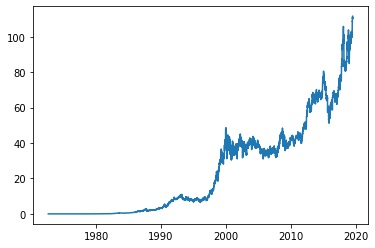

In [ ]:
plt.plot(data.ds, data.y)

* instantiate Prophet

In [ ]:
model = Prophet()

* fit model

In [ ]:
data.head(2)

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678


In [ ]:
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values in future 

In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forcast = model.predict(future)

In [ ]:
forcast[['ds', 'yhat']]

,ds,yhat
0,1972-08-25,-0.382850
1,1972-08-28,-0.384098
2,1972-08-29,-0.369237
3,1972-08-30,-0.386161
4,1972-08-31,-0.387668
...,...,...
12175,2020-06-27,96.521562
12176,2020-06-28,96.524347
12177,2020-06-29,96.511626
12178,2020-06-30,96.532451


* plot forecast

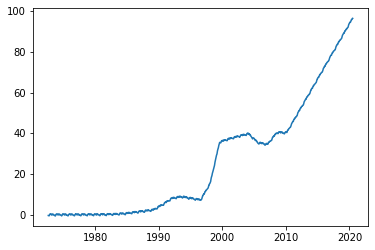

In [ ]:
plt.plot(forcast.ds, forcast.yhat)

* plot components

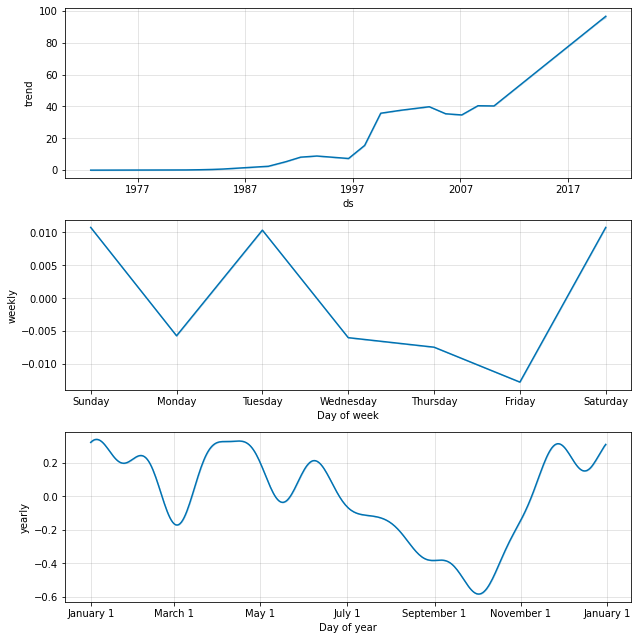

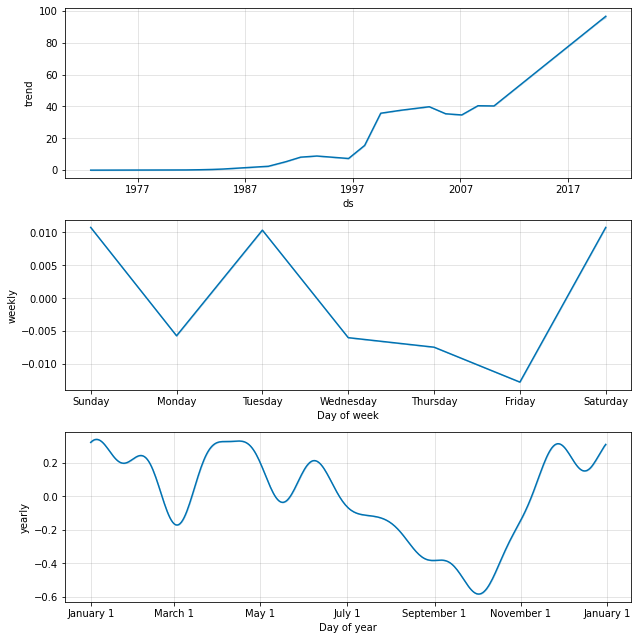

In [ ]:
model.plot_components(forcast)

- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.

In [ ]:
forcast.yhat[-7:]

12173    96.500502
12174    96.496181
12175    96.521562
12176    96.524347
12177    96.511626
12178    96.532451
12179    96.521861
Name: yhat, dtype: float64